## Simple Linear Regression_Ordinary Least Squares (OLS)


#### Q1 (2 points)  
In these exercises we'll be working with simple linear regression. Simple linear regression is an approach for predicting a response using only a single feature.

To create our model, we must “learn” or estimate the values of the regression coefficients $\hat{\beta}0$ and $\hat{\beta}1$. Once we’ve estimated these coefficients, we can use the model to predict responses. Here we are going to use the Least Squares technique as the cost function to estimate the coefficients.


In [7]:
import numpy as np 
def estimate_coef_OLS(X, y): 


    # x: np array of input with size n
    # y: np array of response/output with size n
    ### YOUR CODE HERE ###
                # calculating regression coefficients(B0,B1)
        
    numerator = 0
    denominator = 0

    meanX = np.mean(X)
    meanY = np.mean(y)
    
    for i in range(len(X)):
        numerator += (y[i] - meanY)*(X[i] - meanX)
        denominator += (X[i] - meanX)**2
        
    B1 = numerator / denominator
    B0 = meanY - meanX * B1

    return(B0, B1) 

estimate_coef_OLS(np.array([65,69,72,74,76]), np.array([8,10,11,11,12]))

(-13.967914438502673, 0.3422459893048128)

#### Q2 (4 points)  
Scikit-learn includes a number of dataset simulation functions, one of which is "make_regression ()". Importantly, we can create a dataset for regression that has both informative features and uninformative features, this makes for a good exercise in model selection.

In [8]:
import numpy as np 
from sklearn import linear_model, datasets

n_samples = 100
n_outliers = 5
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=2)
    # Add outlier data
np.random.seed(1)
X[:n_outliers] = 15 + 0.7 * np.random.normal(size=(n_outliers, 1))

 a) Plot the data (X and y)
 
 b) Use your code from the previous part to find the linear model for this dataset.

In [9]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression



### YOUR CODE HERE ###
# use scatter plot to represent the dataset
# Plot the linear regression model that you found from Q1
plt.scatter(X, y)

def plotLinearRegression(x,y):
    B0, B1 = estimate_coef_OLS(x, y)
    slope = B0 + B1*x
    plt.plot(x, slope, color = "red")
    plt.show()
    
plotLinearRegression(X,y)

<Figure size 640x480 with 1 Axes>

c) Try to find the outliers in this dataset, 
Then remove the outliers and find a new linear model for the remained data(without outliers)

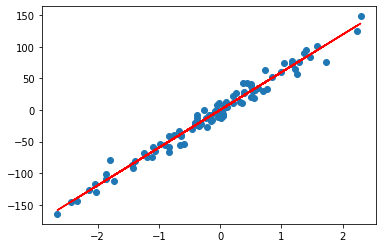

In [10]:
# Hint:you can use mean, variance or Z-score for each dimension to find outliers
from scipy import stats

def removeOutliers(x, y):
    
    #finding the mean and sd
    mean = np.mean(x)
    sd = np.std(x)

    i = 0
    outliers = []

    #going through each index of X to see where it is not within the standard deviance
    #adding each indexes outside of the sd to an array
    for index in x:
        if not (index > mean - 3 * sd and index < mean + 3 * sd):
            outliers.append(i)
        i += 1
    
    #deleting the corresponding indexes of X and y that fell outside of the standard deviance (the outliers)
    #to create new arrays of X and y without outliers
    newX = np.delete(x, outliers)    
    newY = np.delete(y, outliers)
    
    return newX, newY

x1, y1 = removeOutliers(X,y)

plt.scatter(x1, y1)
plotLinearRegression(x1,y1)

d) Use Statsmodel and Scikit-learn (OLS) and compare the result with part (c).

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              4093.
Date:                Sun, 09 Feb 2020   Prob (F-statistic):                    2.67e-79
Time:                        19:35:50   Log-Likelihood:                         -347.52
No. Observations:                  95   AIC:                                      697.0
Df Residuals:                      94   BIC:                                      699.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

'I eliminated the outliers using the same function each time, \nand when using the three different methods, \nthey all produced identical linear regression models using OLS.\nThis is evident when looking at all three of the graphs.\n'

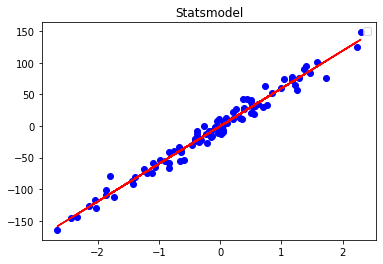

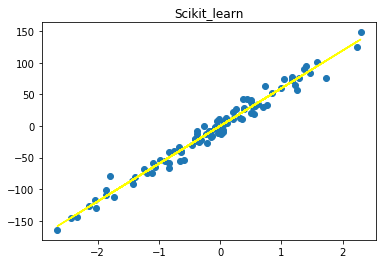

In [11]:
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

### Statsmodel
def statsModel(x,y):
    model = sm.OLS(y, x).fit()
    prstd = wls_prediction_std(model)

    fig, ax = plt.subplots()

    ax.scatter(x, y, color = "blue")
    ax.plot(x, model.fittedvalues, color = "red")

    ax.legend(loc='best')
    ax.set_title("Statsmodel")
    print(model.summary())
    print(model.rsquared)


    


### Scikit-Learn
def sklearn(x,y):
    
    model = linear_model.LinearRegression()
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    
    model.fit(x, y)  # where X is your feature data and y is your target
    yPred = model.predict(x)
    
    fig2, plt2 = plt.subplots()

    plt2.scatter(x, y)
    plt2.plot(x, yPred, color = "yellow")

    plt2.set_title("Scikit_learn")
    
statsModel(x1, y1)

sklearn(x1,y1)

'''I eliminated the outliers using the same function each time, 
and when using the three different methods, 
they all produced identical linear regression models using OLS.
This is evident when looking at all three of the graphs.
'''



# Q3 (4 points)
Kaggle is a competition platform for data scientists. In this class you will learn how to use the platform to practice data-science skills and "compete" with your classmates.

a) Reigster an account on [kaggle.com](https://www.kaggle.com) if you don't have one yet. Type in your kaggle profile name in the following block.

In [12]:
### What is your name on your Kaggle profile?

#Emily Daskas


b) Use [this link](https://www.kaggle.com/t/58bf348e221f4a698c302663cd0e8f5e) to the competition page, and click on the top right button "Join Competition" to join the competition. The name of the competition is "Chapman CS530 Predicting Red Wine Quality". Copy the rules of the competition to the following block.

In [13]:
### What is the rule of the competition?
'''
1. Download the training (train.csv) and testing set (test.csv) from the Data tab. We will talk much more about training and test sets in the course. Generally speaking, for the training set you have the information (the matrix X) and the labels (the vector y). But you do not have the labels for the test set. Here you have the wine rating for the training set but not the the test set. Therefore, your task is to fit a regression model based on the training set (where you are given the quality of the wine for each entry) and then predict as accuracy as possible on the quality of wines in the testing set, where you do not have the quality of the wine.

2. This competition is designed for the "Regression, Resampling and Regularization Module" and it is part of the homework assignments. Submission closes on Sunday at 11:59pm.

3. You are expected to submit your solutions to Kaggle and also your code on Canvas to get full credits.'''

'\n1. Download the training (train.csv) and testing set (test.csv) from the Data tab. We will talk much more about training and test sets in the course. Generally speaking, for the training set you have the information (the matrix X) and the labels (the vector y). But you do not have the labels for the test set. Here you have the wine rating for the training set but not the the test set. Therefore, your task is to fit a regression model based on the training set (where you are given the quality of the wine for each entry) and then predict as accuracy as possible on the quality of wines in the testing set, where you do not have the quality of the wine.\n\n2. This competition is designed for the "Regression, Resampling and Regularization Module" and it is part of the homework assignments. Submission closes on Sunday at 11:59pm.\n\n3. You are expected to submit your solutions to Kaggle and also your code on Canvas to get full credits.'

c) Download the necessary datasets, read the data into a pandas dataframe and run any necessary data preprocessing techniques to allow further analysis.

In [33]:
import pandas as pd

### YOUR CODE for c) GOES HERE

train = pd.read_csv('train.csv') # Read in files into a dataframe
train.head()

test = pd.read_csv('test.csv')
test.head()
  
    
# I did some more preprocessing in the next part, taking out any empty cells 


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,9.6,0.54,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4
1,1,7.6,0.55,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.7
2,2,8.6,0.47,0.30,3.0,0.076,30.0,135.0,0.99760,3.30,0.53,9.4
3,3,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2
4,4,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5


d) Choose one variable that you think might have the biggest effects on the quality of wine. Fit a single linear regression model to that variable using Statsmodel. Plot a scatter plot of the dependent variable over the independent variable and also plot the fitted line on the same plot to see how well your model fits. Also add the R<sup>2</sup> score as the title of the plot.

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          1.883e+04
Date:                Sun, 09 Feb 2020   Prob (F-statistic):                        0.00
Time:                        20:15:04   Log-Likelihood:                         -1906.9
No. Observations:                1112   AIC:                                      3816.
Df Residuals:                    1111   BIC:                                      3821.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

array([ 5.83295754,  4.51848823,  4.35417957,  5.66864887,  4.92925989,
        6.57234652,  4.35417957,  3.61479059,  7.06527251,  4.92925989,
        5.50434021,  5.75080321,  5.34003155,  5.42218588,  6.90096385,
        4.35417957,  5.42218588,  4.4363339 ,  4.76495123,  4.92925989,
        5.75080321,  4.92925989,  4.4363339 ,  5.83295754,  6.32588353,
        4.76495123,  4.02556224,  4.84710556,  4.51848823,  4.6827969 ,
        4.76495123,  7.3117355 ,  5.75080321,  3.94340791,  4.02556224,
        4.92925989,  8.54405048,  5.01141422,  4.18987091,  6.40803786,
        6.73665518,  3.61479059,  4.35417957,  4.27202524,  5.91511187,
        5.34003155,  3.86125358,  4.6827969 ,  7.14742684,  4.6827969 ,
        3.94340791,  5.42218588,  3.20401893,  5.91511187,  5.01141422,
        3.94340791,  5.34003155,  5.25787722,  4.76495123,  5.25787722,
        3.53263625,  5.58649454,  4.60064256,  4.6827969 ,  5.17572288,
        4.27202524,  4.60064256,  5.83295754,  6.49019219,  6.32

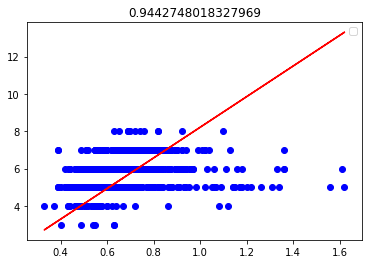

In [49]:


### YOUR CODE for d) GOES HERE

dep = train.loc[:,['quality']]
indep = train.loc[:,['sulphates']]

indepTest = test.loc[:,['sulphates']]

def qualityTest(x, y, showGraph, test):
    x = np.array(x)
    y = np.array(y)
    
  #  x1, y1 = removeOutliers(x, y)
    for row in y:
        try:
            x1, y1 = removeOutliers(x, y)
        except: 
            print("empty")

    model = sm.OLS(y1, x1).fit()


    if showGraph == True:
        statsModel(x1, y1)
        plt.title(model.rsquared)


        

    pred = np.array(model.predict(test))

    return pred


    
qualityTest(indep, dep, True, indepTest)




e) Make predictions on the testing set using your model created in d), create a submission and submit it to kaggle. 

In [50]:
### YOUR CODE for e) GOES HERE
test = pd.read_csv('test.csv')
test.head()

predictQuality = qualityTest(indep, dep, False, indepTest)
test.insert(1, "Quality", predictQuality)


test.loc[:,['Id', 'Quality']]











,Id,Quality
0,0,5.832958
1,1,4.518488
2,2,4.354180
3,3,5.668649
4,4,4.929260
...,...,...
475,475,4.436334
476,476,4.764951
477,477,4.929260
478,478,4.929260


In [45]:
### Report the score of your first submission on Kaggle here

#36.11378

f) Try to fit the regression model using a different variable. Create another submission and submit it to kaggle. Discuss why that variable was better, worse, or roughly the same as the previous variable that you fit.

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          5.397e+04
Date:                Sun, 09 Feb 2020   Prob (F-statistic):                        0.00
Time:                        20:01:52   Log-Likelihood:                         -1345.1
No. Observations:                1114   AIC:                                      2692.
Df Residuals:                    1113   BIC:                                      2697.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

array([5.63736398, 5.63397139, 5.64075658, 5.66280845, 5.61796964,
       5.65234795, 5.64205707, 5.61706495, 5.63906028, 5.6220973 ,
       5.64528004, 5.64358374, 5.63849485, 5.64471461, 5.62944792,
       5.62605533, 5.66902821, 5.63001336, 5.64528004, 5.63600694,
       5.64132201, 5.63990843, 5.64075658, 5.65432696, 5.61904396,
       5.62831706, 5.63397139, 5.63623312, 5.63001336, 5.63029607,
       5.62888249, 5.64414918, 5.62820397, 5.62944792, 5.64612819,
       5.62865632, 5.63566768, 5.64019115, 5.63351904, 5.62435903,
       5.64641091, 5.5981795 , 5.62922175, 5.63544151, 5.63397139,
       5.64528004, 5.63125731, 5.6531961 , 5.63872102, 5.65263067,
       5.61927014, 5.63674201, 5.63097459, 5.64539313, 5.65093437,
       5.63170966, 5.63103114, 5.63510225, 5.62153187, 5.63391484,
       5.62571607, 5.62978718, 5.63566768, 5.64584547, 5.62820397,
       5.63544151, 5.63679855, 5.6481072 , 5.65885043, 5.63267089,
       5.67066797, 5.64301831, 5.65206523, 5.64245288, 5.63284

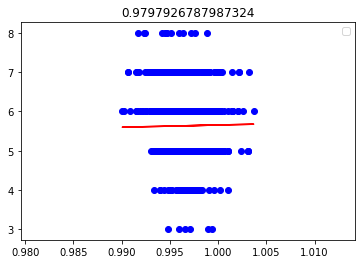

In [47]:
### YOUR CODE for f) GOES HERE

dep = train.loc[:,['quality']]
indep = train.loc[:,['density']]

indepTest = test.loc[:,['density']]
    
qualityTest(indep, dep, True, indepTest)

### DISCUSSION
### this variable was slightly better as it had a higheer R^2 value. .98 compared to .944, 
### but overall, they are very close, and it will probably depend on the data. 
### Also, sulphates did not havee any empty cells in the dataset, but density did.
### It was also interesting to see how the different dependencies helped and what they were capable of.



In [ ]:
### Report the score of your second submission on Kaggle here
34.27274

In [ ]:
### Discussion Goes Here
# I thought that this assignment was definitely challenging. 
# It required a lot of expirimenting and trial and error before figuring it out. 
# However, the more I worked through it, the more I started to get the hang of it and the easier it became to understand.
# I am still a little unclear about how the R2 is reeflected in the linear regression line, as some of them don't seem to match up completely.
# But it does seem as if the R2 is pretty reflective of the scores after submitting on Kaggle.